In [173]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def clean(ax):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)


## Classification

In [32]:
female = pd.read_csv('./ANSUR II FEMALE Public.csv')
male = pd.read_csv('./ANSUR II MALE Public.csv')

In [33]:
# Print available features
list(female)

['SubjectId',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbread

In [35]:
male.stature

0       1776
1       1702
2       1735
3       1655
4       1914
5       1720
6       1810
7       1850
8       1777
9       1811
10      1780
11      1733
12      1814
13      1861
14      1709
15      1740
16      1694
17      1766
18      1748
19      1794
20      1780
21      1680
22      1653
23      1959
24      1755
25      1630
26      1825
27      1795
28      1745
29      1818
        ... 
4052    1700
4053    1780
4054    1758
4055    1818
4056    1703
4057    1706
4058    1726
4059    1763
4060    1652
4061    1805
4062    1874
4063    1816
4064    1740
4065    1681
4066    1655
4067    1763
4068    1746
4069    1733
4070    1757
4071    1567
4072    1703
4073    1718
4074    1871
4075    1728
4076    1788
4077    1688
4078    1765
4079    1690
4080    1718
4081    1828
Name: stature, Length: 4082, dtype: int64

In [42]:
female_sel = female[['Age', 'Heightin', 'Gender']]
male_sel = male[['Age', 'Heightin', 'Gender']]

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [74]:
# get some example data

samplem = male[:10][['stature', 'interscyeii', 'Gender']]
samplef = female[:10][['stature', 'interscyeii', 'Gender']]

sample = pd.concat([samplem, samplef])
sample['stature'] = (sample['stature'] * 0.1).round().astype(int)
sample['interscyeii'] = (sample['interscyeii'] * 0.1).round().astype(int)
sample['Gender'] = sample['Gender'].str.lower()


# shuffle the rows
sample.sample(frac=1)

,stature,interscyeii,Gender
9,181,46,male
6,181,50,male
3,166,44,female
5,171,38,female
8,152,36,female
0,156,40,female
7,167,40,female
1,170,45,male
8,178,50,male
4,191,50,male


In [106]:
# Get a bigger dataset to build a classifier on
# (not too big, so it's visually understandable)

samplem = male[:300][['stature', 'interscyeii', 'Gender']]
samplef = female[:300][['stature', 'interscyeii', 'Gender']]

sample = pd.concat([samplem, samplef])
sample['stature'] = (sample['stature'] * 0.1)
sample['interscyeii'] = (sample['interscyeii'] * 0.1)
sample['Gender'] = sample['Gender'].astype('category').cat.codes # convert string labels to type "category"
                                                                 # and convert those to integers
 
# shuffle the rows
data = sample.sample(frac=1)

x = data[['stature', 'interscyeii']].as_matrix()
x_train = x[:150, :]
x_test  = x[150:, :]

y = data.Gender.values # convert the categories to integers
y_train = y[:150]
y_test = y[150:]

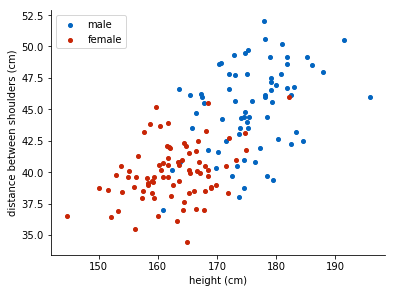

In [131]:
plt.figure(figsize=(6, 4.5))

tr = data[:150]
trm = tr[tr.Gender == 1]
trf = tr[tr.Gender == 0]

s = 16
a = 1.0
plt.scatter(trm.stature.values, trm.interscyeii.values, label='male', s=s, alpha=a, color=BLUE)
plt.scatter(trf.stature.values, trf.interscyeii.values,  label='female', s=s, alpha=a, color=RED)

plt.xlabel('height (cm)')
plt.ylabel('distance between shoulders (cm)')
plt.legend()

clean(plt.gca())

plt.savefig('data.pdf') # get a pdf of the image

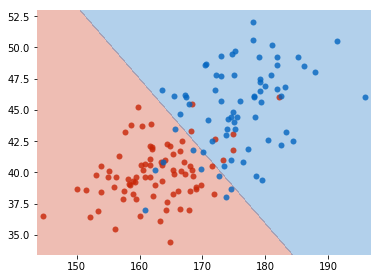

In [132]:
import matplotlib
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
import numpy as np
import mlxtend

# This is a linear classifier, it just has a fancy name
cls = SVC(kernel='linear')
cls.fit(x_train, y_train)

# plot the decision boundary
plt.figure(figsize=(6, 4.5))

ax = plot_decision_regions(x_train, y_train, clf=cls, res=0.02, legend=None, markers='oo', colors=RED+','+BLUE);

for obj in ax.findobj():
    if isinstance(obj, matplotlib.collections.PathCollection):
        obj.set_linewidth(0)

plt.savefig('linear-boundary.pdf')

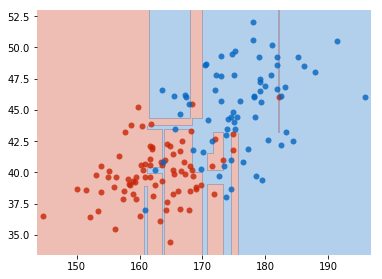

In [133]:
from sklearn.tree import DecisionTreeClassifier

# This is a linear classifier, it just has a fancy name
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# plot the decision boundary
plt.figure(figsize=(6, 4.5))

ax = plot_decision_regions(x_train, y_train, clf=tree, res=0.02, legend=None, markers='oo', colors=RED+','+BLUE);

for obj in ax.findobj():
    if isinstance(obj, matplotlib.collections.PathCollection):
        obj.set_linewidth(0)

plt.savefig('tree-boundary.pdf')

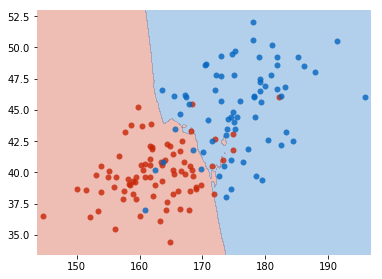

In [134]:
from sklearn.neighbors import KNeighborsClassifier

# This is a linear classifier, it just has a fancy name
knn = KNeighborsClassifier(7)
knn.fit(x_train, y_train)

# plot the decision boundary
plt.figure(figsize=(6, 4.5))

ax = plot_decision_regions(x_train, y_train, clf=knn, res=0.02, legend=None, markers='oo', colors=RED+','+BLUE);

for obj in ax.findobj():
    if isinstance(obj, matplotlib.collections.PathCollection):
        obj.set_linewidth(0)

plt.savefig('knn-boundary.pdf')

## Regression

In [148]:
# get some example data

sample = male[:20][['stature', 'trochanterionheight']]

sample['stature'] = (sample['stature'] * 0.1).round().astype(int)
sample['trochanterionheight'] = (sample['trochanterionheight'] * 0.1).round().astype(int)

# shuffle the rows
sample.sample(frac=1)

,stature,trochanterionheight
15,174,96
9,181,98
17,177,93
10,178,92
0,178,92
12,181,100
13,186,98
19,179,94
2,174,92
18,175,94


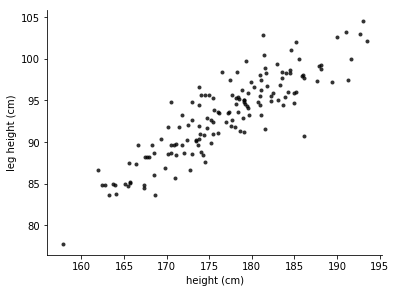

In [159]:
# bigger example data

rdata = male[:300][['stature', 'trochanterionheight']]

rdata['stature'] = rdata['stature'] * 0.1
rdata['trochanterionheight'] = rdata['trochanterionheight'] * 0.1

rdata = rdata.sample(frac=1)

rx_train = rdata[:150].stature.values.reshape(-1, 1)
rx_test = rdata[150:].stature.values.reshape(-1, 1)

ry_train = rdata[:150].trochanterionheight.values
ry_test = rdata[150:].trochanterionheight.values

plt.figure(figsize=(6, 4.5))

s = 16
a = 0.8
plt.scatter(rx_train, ry_train, s=s, alpha=a, color='k', linewidth=0)

plt.xlabel('height (cm)')
plt.ylabel('leg height (cm)')

clean(plt.gca())

plt.savefig('regression-data.pdf')

In [169]:
alpha=0.5

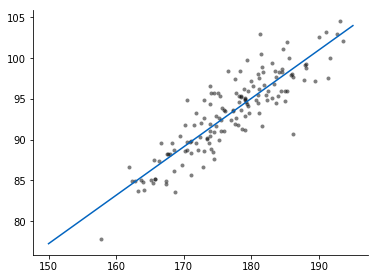

In [170]:
# Fit a linear model
from sklearn.linear_model import LinearRegression

# Fit the model
linear = LinearRegression()
linear.fit(rx_train, ry_train)

# Plot the model
plt.figure(figsize=(6, 4.5))

plt.scatter(rx_train, ry_train, s=s, alpha=alpha, color='k', linewidth=0)

# Get 500 equally spaced input points
xlin = np.linspace(150, 195, 500).reshape(-1, 1)

plt.plot(xlin, linear.predict(xlin), color=BLUE)

clean(plt.gca())

plt.savefig('linear-regression.pdf')

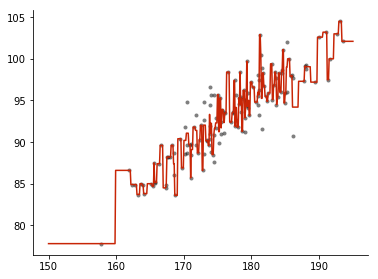

In [171]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(rx_train, ry_train)

# Plot the model
plt.figure(figsize=(6, 4.5))

plt.scatter(rx_train, ry_train, s=s, alpha=alpha, color='k', linewidth=0)

# Get 500 equally spaced input points
xlin = np.linspace(150, 195, 500).reshape(-1, 1)

plt.plot(xlin, tree.predict(xlin), color=RED)

clean(plt.gca())

plt.savefig('tree-regression.pdf')

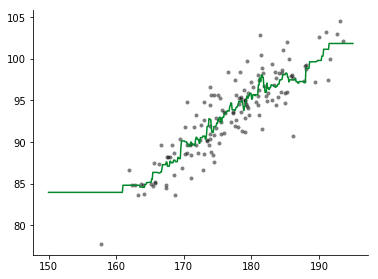

In [174]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(7)
knn.fit(rx_train, ry_train)

# Plot the model
plt.figure(figsize=(6, 4.5))

plt.scatter(rx_train, ry_train, s=s, alpha=alpha, color='k', linewidth=0)

# Get 500 equally spaced input points
xlin = np.linspace(150, 195, 500).reshape(-1, 1)

plt.plot(xlin, knn.predict(xlin), color=GREEN)

clean(plt.gca())

plt.savefig('knn-regression.pdf')
